In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [2]:
#getting tha data
directory = "World-Happiness-Report-Model"
filename = "WHR2018Chapter2OnlineData.xls"

# Combining the directory and filename into a full path
file_path = r"./WHR2018Chapter2OnlineData.xls"
df = pd.read_excel(file_path, header=0)

# Analyzing the Features

In [3]:
df.isna().sum()

country                                                       0
year                                                          0
Life Ladder                                                   0
Log GDP per capita                                           27
Social support                                               13
Healthy life expectancy at birth                              9
Freedom to make life choices                                 29
Generosity                                                   80
Perceptions of corruption                                    90
Positive affect                                              18
Negative affect                                              12
Confidence in national government                           161
Democratic Quality                                          171
Delivery Quality                                            171
Standard deviation of ladder by country-year                  0
Standard deviation/Mean of ladder by cou

In [4]:
# Drop unwanted features due to lack of relevance or too many missing values
df.drop(columns=['country', 'Standard deviation of ladder by country-year', 'Standard deviation/Mean of ladder by country-year', 'GINI index (World Bank estimate)', 
                 'gini of household income reported in Gallup, by wp5-year', 'GINI index (World Bank estimate), average 2000-15'], axis=1, inplace=True)
df

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality
0,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084
1,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025
2,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176
3,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221
4,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1557,2013,4.690188,7.565154,0.799274,48.949745,0.575884,-0.076716,0.830937,0.711885,0.182288,0.527755,-1.026085,-1.526321
1558,2014,4.184451,7.562753,0.765839,50.051235,0.642034,-0.045885,0.820217,0.725214,0.239111,0.566209,-0.985267,-1.484067
1559,2015,3.703191,7.556052,0.735800,50.925652,0.667193,-0.094585,0.810457,0.715079,0.178861,0.590012,-0.893078,-1.357514
1560,2016,3.735400,7.538829,0.768425,51.800068,0.732971,-0.065283,0.723612,0.737636,0.208555,0.699344,-0.863044,-1.371214


# Winsorizing the Features Have Outliers

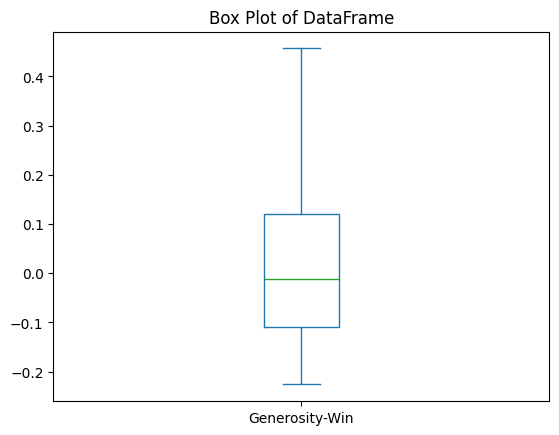

In [5]:
# Manipulating the outliers 
#need to organize generoisty, negative affect, corruption, social support

#generouity 
df['Generosity-Win'] = stats.mstats.winsorize(df['Generosity'], limits=[0.06, 0.06])

df['Generosity-Win'].plot.box()

plt.title('Box Plot of DataFrame')
plt.show()


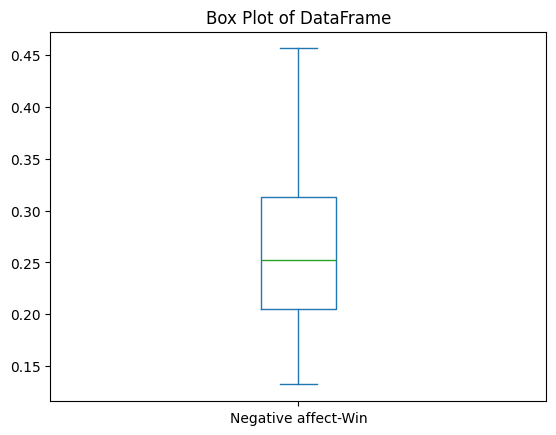

In [6]:
#negative affect, corruption, social support

#neg affect
df['Negative affect-Win'] = stats.mstats.winsorize(df['Negative affect'], limits=[0.03, 0.03])

df['Negative affect-Win'].plot.box()

plt.title('Box Plot of DataFrame')
plt.show()

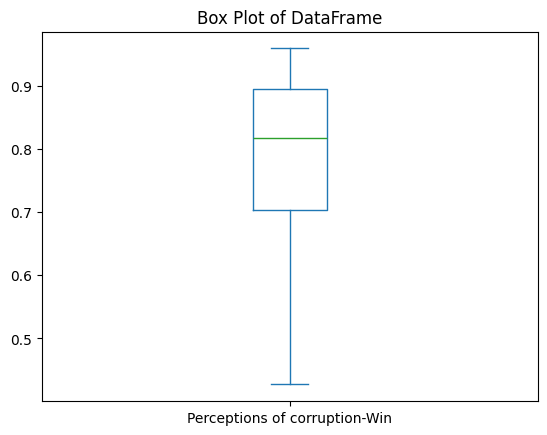

In [7]:
#corruption, social support

#corruption
df['Perceptions of corruption-Win'] = stats.mstats.winsorize(df['Perceptions of corruption'], limits=[0.085, 0.085])

df['Perceptions of corruption-Win'].plot.box()

plt.title('Box Plot of DataFrame')
plt.show()

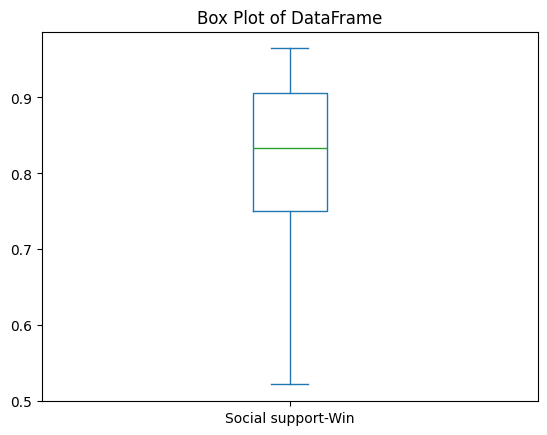

In [8]:
#social support

#corruption
df['Social support-Win'] = stats.mstats.winsorize(df['Social support'], limits=[0.025, 0.025])

df['Social support-Win'].plot.box()

plt.title('Box Plot of DataFrame')
plt.show()

                                       year  Life Ladder  Log GDP per capita  \
year                               1.000000    -0.014505            0.051140   
Life Ladder                       -0.014505     1.000000            0.779476   
Log GDP per capita                 0.051140     0.779476            1.000000   
Social support                    -0.052845     0.700299            0.658591   
Healthy life expectancy at birth   0.100904     0.729852            0.841612   
Freedom to make life choices       0.134332     0.526058            0.362998   
Generosity                        -0.014111     0.204910           -0.000334   
Perceptions of corruption         -0.051141    -0.425013           -0.350142   
Positive affect                   -0.024730     0.554462            0.311868   
Negative affect                    0.171805    -0.267492           -0.120597   
Confidence in national government -0.018925    -0.085543           -0.162000   
Democratic Quality                -0.017

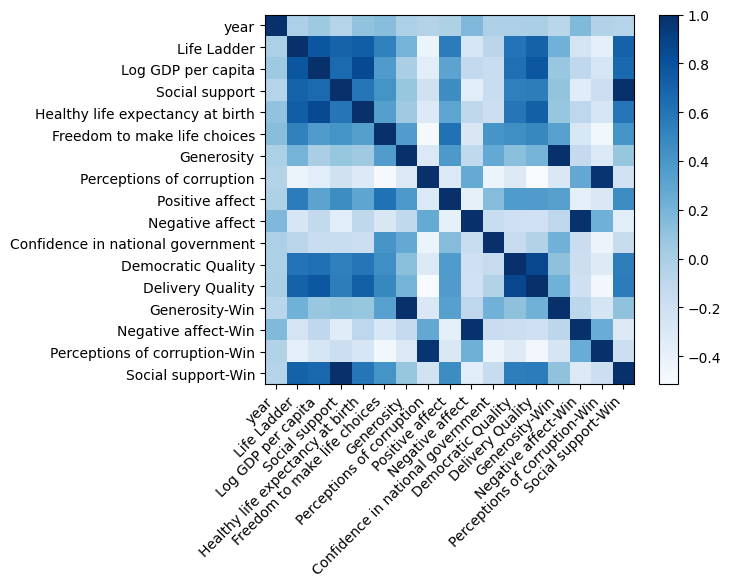

In [9]:
# Create a correlation matrix so we know which features are most highly correlated with the label
# Those that are not we can drop to reduce unecessary computing power
corr_matrix = df.corr()
print(corr_matrix)

# Visualize the correlation matrix
# Plotting correlation matrix
plt.imshow(corr_matrix, cmap='Blues')

# adding colorbar
plt.colorbar()

# Extracting variable names
variables = []
for i in corr_matrix.columns:
    variables.append(i)

# Adding labels to the matrix
plt.xticks(range(len(corr_matrix)), variables, rotation=45, ha='right')
plt.yticks(range(len(corr_matrix)), variables)

# Display the plot
plt.show()

In [10]:
# dropping columns due to low correlation with the label
df.drop(columns=['year', 'Social support', 'Generosity', 'Negative affect', 'Confidence in national government', 'Generosity-Win', 'Negative affect-Win'], axis=1, inplace=True)

In [11]:
# rounding all the numbers in the label to integers
df['Healthy life expectancy at birth'] = df['Healthy life expectancy at birth'].round(0)
df

,Life Ladder,Log GDP per capita,Healthy life expectancy at birth,Freedom to make life choices,Perceptions of corruption,Positive affect,Democratic Quality,Delivery Quality,Perceptions of corruption-Win,Social support-Win
0,3.723590,7.168690,49.0,0.718114,0.881686,0.517637,-1.929690,-1.655084,0.881686,0.521747
1,4.401778,7.333790,50.0,0.678896,0.850035,0.583926,-2.044093,-1.635025,0.850035,0.552308
2,4.758381,7.386629,50.0,0.600127,0.706766,0.618265,-1.991810,-1.617176,0.706766,0.539075
3,3.831719,7.415019,50.0,0.495901,0.731109,0.611387,-1.919018,-1.616221,0.731109,0.521747
4,3.782938,7.517126,51.0,0.530935,0.775620,0.710385,-1.842996,-1.404078,0.775620,0.521747
...,...,...,...,...,...,...,...,...,...,...
1557,4.690188,7.565154,49.0,0.575884,0.830937,0.711885,-1.026085,-1.526321,0.830937,0.799274
1558,4.184451,7.562753,50.0,0.642034,0.820217,0.725214,-0.985267,-1.484067,0.820217,0.765839
1559,3.703191,7.556052,51.0,0.667193,0.810457,0.715079,-0.893078,-1.357514,0.810457,0.735800
1560,3.735400,7.538829,52.0,0.732971,0.723612,0.737636,-0.863044,-1.371214,0.723612,0.768425


# Testing Models: Linear Regression, Random Forest, Gradient Boosting, KNN

In [12]:
# we need to drop all the rows with NaN values so that the model will work
df = df.dropna(axis=0, how='any')

# creating training, test, and validation sets
X = df.drop(columns=['Healthy life expectancy at birth'], axis=1)
y = df['Healthy life expectancy at birth']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

In [13]:
# creating the model, training it, and testing the amount of error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

models = {
   'LinearRegression': LinearRegression(),
   'Random Forest': RandomForestRegressor(n_estimators=100, random_state = 1),
   'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state = 12),
   'KNN': KNeighborsClassifier(n_neighbors=3)
}

In [14]:
def fit_models(X_train_new, y_train_new):

    for name, model in models.items():
        model.fit(X_train_new, y_train_new)
        predictions = model.predict(X_test)
        # mean_squared error 
        ms_error = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)  
        print(f"{name} - Mean squared error: {ms_error}")
        print(f"{name} - R2 score: {r2}")
        print("-" * 30)

        print("Predictions vs Actual Values:")
        for i in range(5):
            print(f"Prediction: {predictions[i]:.2f}, Actual: {y_test.iloc[i]:.2f}")
        
        # Plot predicted vs actual values
        plt.figure(figsize=(10, 6))
        plt.scatter(y_test, predictions)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
        plt.xlabel("Actual Values")
        plt.ylabel("Predicted Values")
        plt.title(f"Predicted vs Actual Values for {name}")
        plt.show()


Fold 1/5
LinearRegression - Mean squared error: 15.70925698022978
LinearRegression - R2 score: 0.7618409911653644
------------------------------
Predictions vs Actual Values:
Prediction: 60.21, Actual: 65.00
Prediction: 72.48, Actual: 71.00
Prediction: 50.79, Actual: 42.00
Prediction: 50.79, Actual: 55.00
Prediction: 61.68, Actual: 62.00


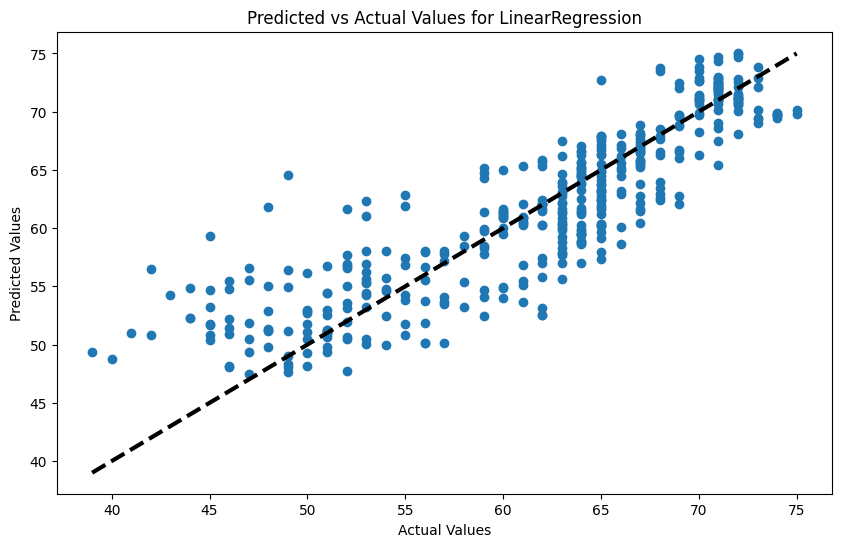

Random Forest - Mean squared error: 7.467145176470588
Random Forest - R2 score: 0.886794907213584
------------------------------
Predictions vs Actual Values:
Prediction: 63.60, Actual: 65.00
Prediction: 71.02, Actual: 71.00
Prediction: 43.30, Actual: 42.00
Prediction: 54.66, Actual: 55.00
Prediction: 61.16, Actual: 62.00


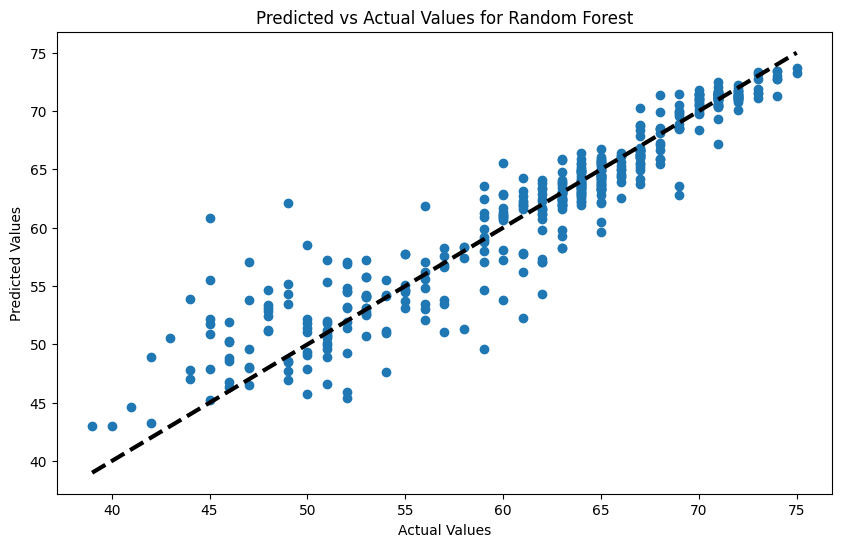

Gradient Boosting - Mean squared error: 9.461698162165833
Gradient Boosting - R2 score: 0.8565566366996342
------------------------------
Predictions vs Actual Values:
Prediction: 64.02, Actual: 65.00
Prediction: 71.29, Actual: 71.00
Prediction: 44.50, Actual: 42.00
Prediction: 55.29, Actual: 55.00
Prediction: 61.11, Actual: 62.00


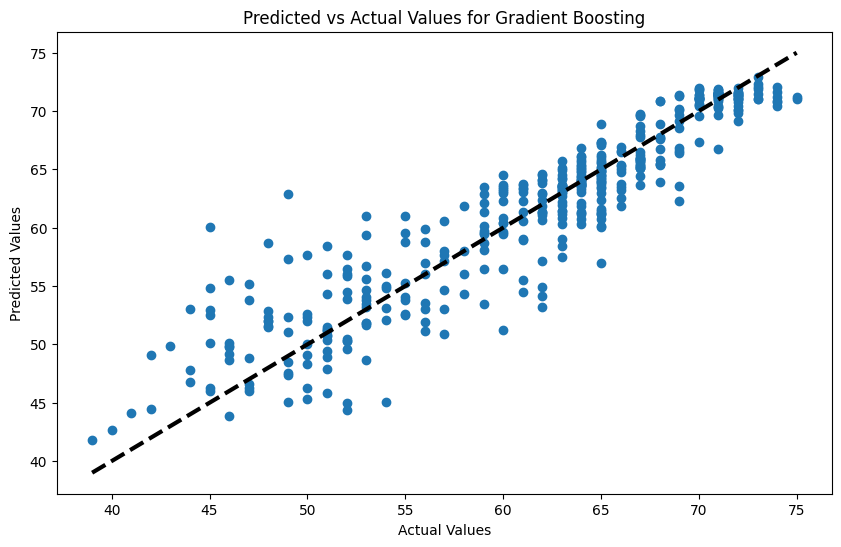

KNN - Mean squared error: 14.087058823529413
KNN - R2 score: 0.7864342043020103
------------------------------
Predictions vs Actual Values:
Prediction: 64.00, Actual: 65.00
Prediction: 72.00, Actual: 71.00
Prediction: 43.00, Actual: 42.00
Prediction: 56.00, Actual: 55.00
Prediction: 61.00, Actual: 62.00


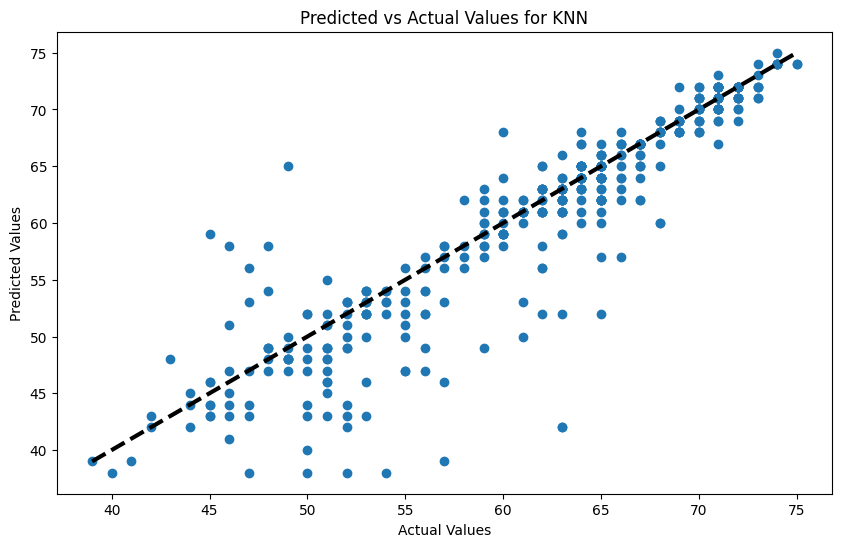

Fold 2/5
LinearRegression - Mean squared error: 15.677307842158903
LinearRegression - R2 score: 0.7623253536699474
------------------------------
Predictions vs Actual Values:
Prediction: 60.21, Actual: 65.00
Prediction: 72.85, Actual: 71.00
Prediction: 50.67, Actual: 42.00
Prediction: 50.49, Actual: 55.00
Prediction: 61.38, Actual: 62.00


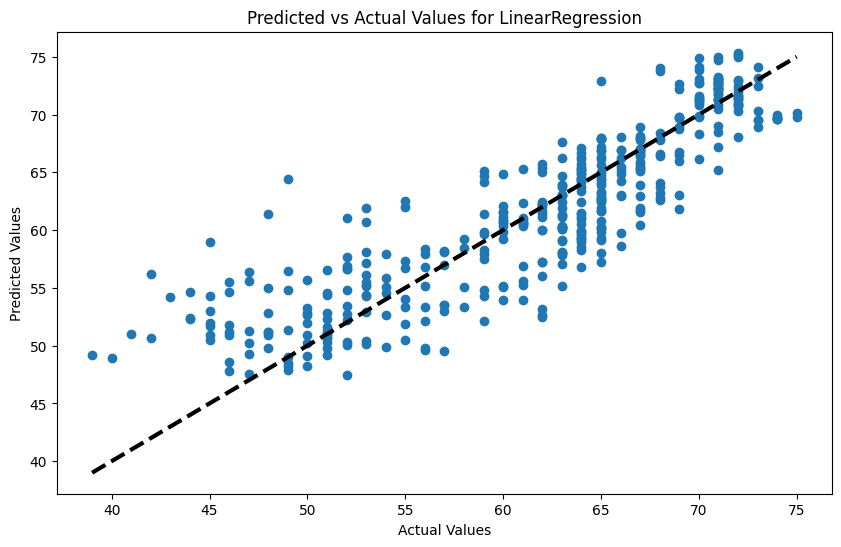

Random Forest - Mean squared error: 7.826385882352941
Random Forest - R2 score: 0.8813486655133134
------------------------------
Predictions vs Actual Values:
Prediction: 64.46, Actual: 65.00
Prediction: 70.88, Actual: 71.00
Prediction: 43.12, Actual: 42.00
Prediction: 54.03, Actual: 55.00
Prediction: 62.38, Actual: 62.00


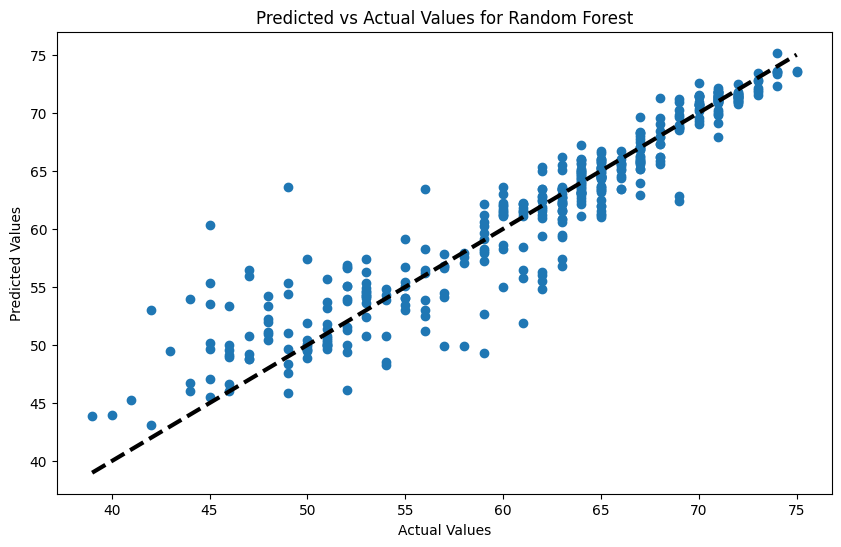

Gradient Boosting - Mean squared error: 9.780710104181331
Gradient Boosting - R2 score: 0.8517202801480519
------------------------------
Predictions vs Actual Values:
Prediction: 63.38, Actual: 65.00
Prediction: 71.21, Actual: 71.00
Prediction: 42.11, Actual: 42.00
Prediction: 54.16, Actual: 55.00
Prediction: 61.25, Actual: 62.00


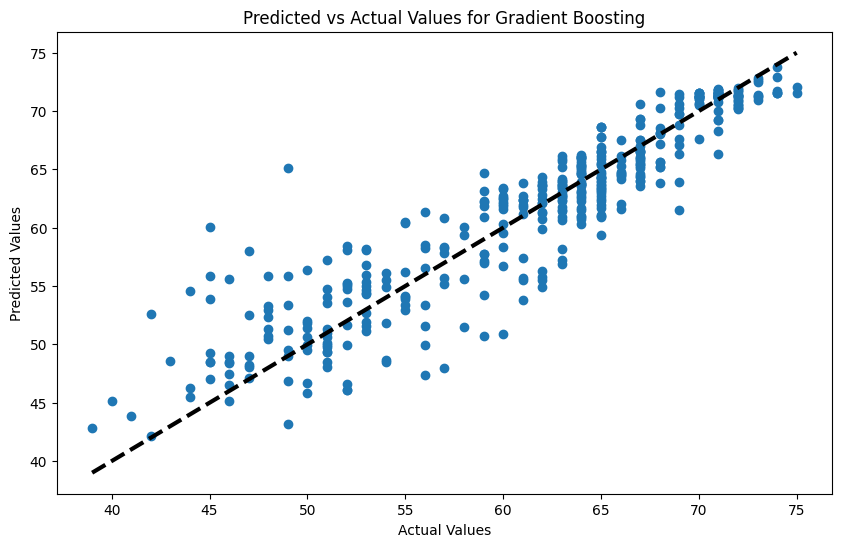

KNN - Mean squared error: 14.36
KNN - R2 score: 0.7822963001261347
------------------------------
Predictions vs Actual Values:
Prediction: 64.00, Actual: 65.00
Prediction: 71.00, Actual: 71.00
Prediction: 43.00, Actual: 42.00
Prediction: 55.00, Actual: 55.00
Prediction: 61.00, Actual: 62.00


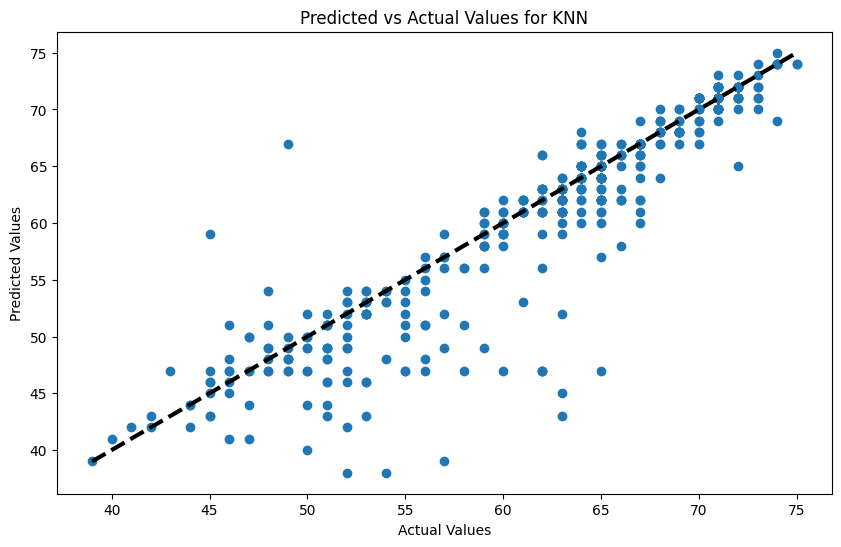

Fold 3/5
LinearRegression - Mean squared error: 15.774974081658398
LinearRegression - R2 score: 0.7608446919922449
------------------------------
Predictions vs Actual Values:
Prediction: 60.04, Actual: 65.00
Prediction: 72.36, Actual: 71.00
Prediction: 50.48, Actual: 42.00
Prediction: 51.03, Actual: 55.00
Prediction: 61.87, Actual: 62.00


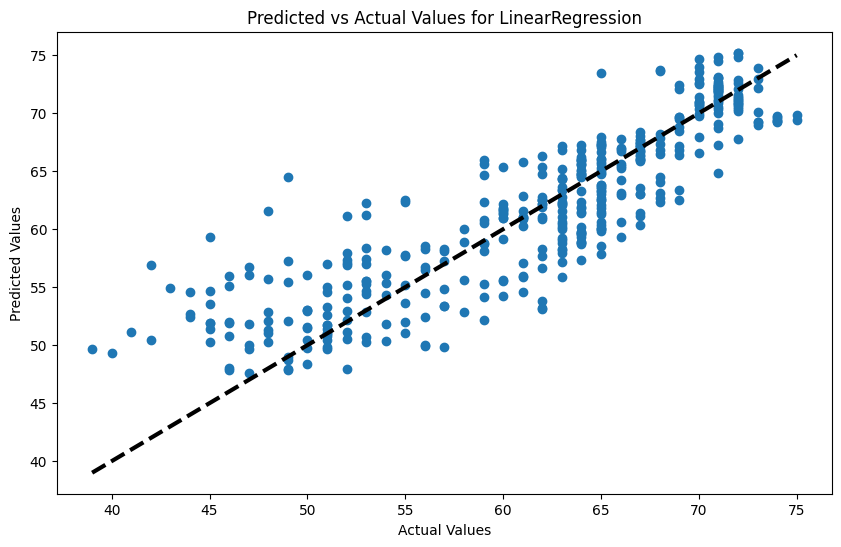

Random Forest - Mean squared error: 8.672568235294118
Random Forest - R2 score: 0.8685201815994368
------------------------------
Predictions vs Actual Values:
Prediction: 63.20, Actual: 65.00
Prediction: 71.35, Actual: 71.00
Prediction: 43.00, Actual: 42.00
Prediction: 54.54, Actual: 55.00
Prediction: 61.15, Actual: 62.00


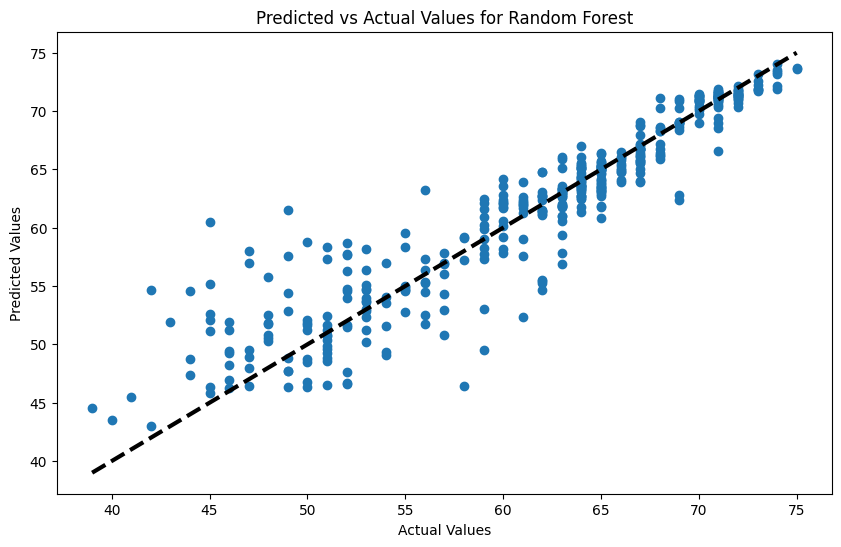

Gradient Boosting - Mean squared error: 10.510730960494838
Gradient Boosting - R2 score: 0.8406528538663989
------------------------------
Predictions vs Actual Values:
Prediction: 63.60, Actual: 65.00
Prediction: 71.58, Actual: 71.00
Prediction: 42.79, Actual: 42.00
Prediction: 55.65, Actual: 55.00
Prediction: 61.89, Actual: 62.00


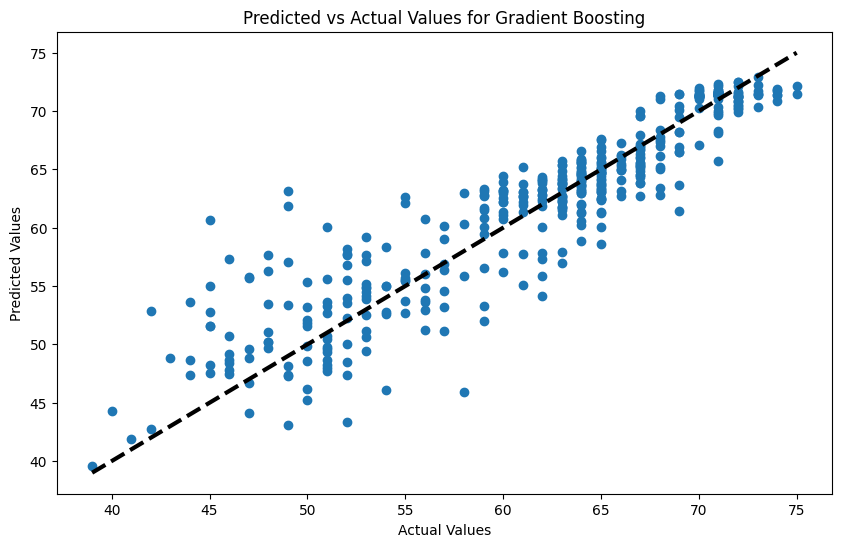

KNN - Mean squared error: 15.828235294117647
KNN - R2 score: 0.7600372293869422
------------------------------
Predictions vs Actual Values:
Prediction: 64.00, Actual: 65.00
Prediction: 72.00, Actual: 71.00
Prediction: 40.00, Actual: 42.00
Prediction: 55.00, Actual: 55.00
Prediction: 61.00, Actual: 62.00


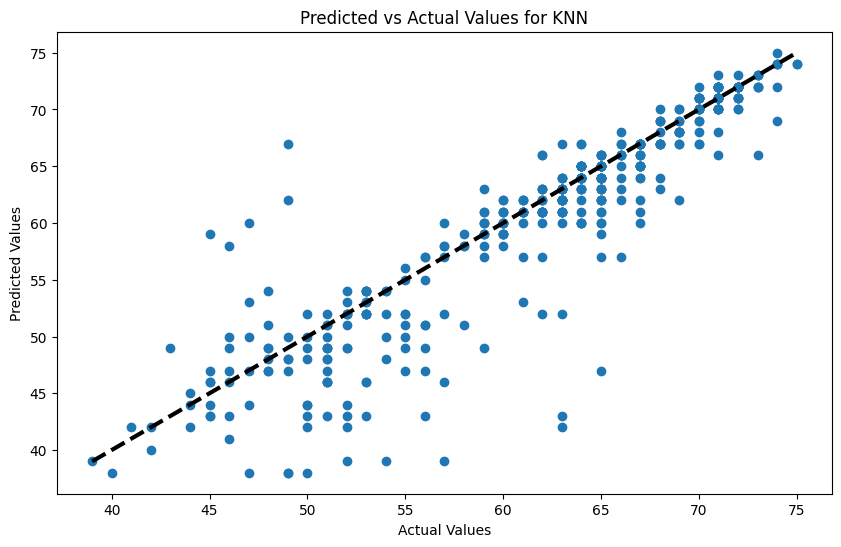

Fold 4/5
LinearRegression - Mean squared error: 15.533023179838993
LinearRegression - R2 score: 0.7645127704402883
------------------------------
Predictions vs Actual Values:
Prediction: 60.43, Actual: 65.00
Prediction: 72.36, Actual: 71.00
Prediction: 51.19, Actual: 42.00
Prediction: 50.29, Actual: 55.00
Prediction: 61.25, Actual: 62.00


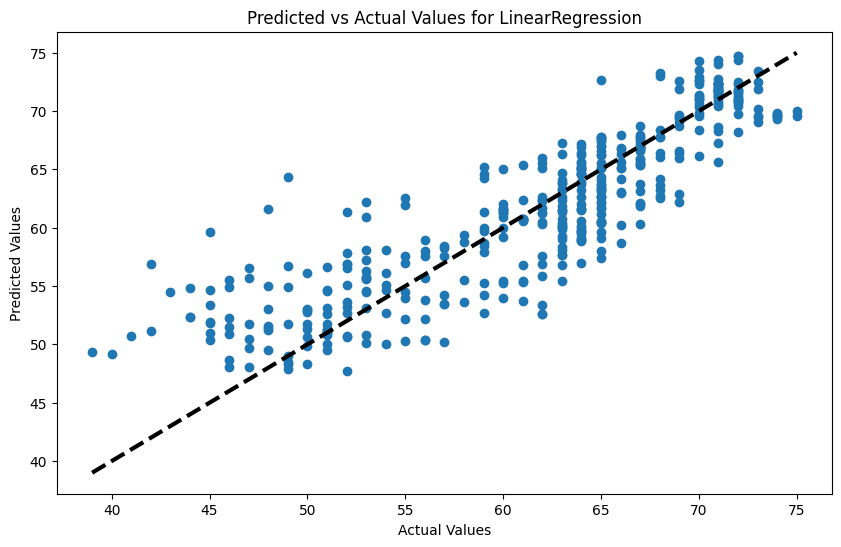

Random Forest - Mean squared error: 7.798690823529413
Random Forest - R2 score: 0.8817685343694489
------------------------------
Predictions vs Actual Values:
Prediction: 62.85, Actual: 65.00
Prediction: 70.99, Actual: 71.00
Prediction: 43.89, Actual: 42.00
Prediction: 54.19, Actual: 55.00
Prediction: 60.44, Actual: 62.00


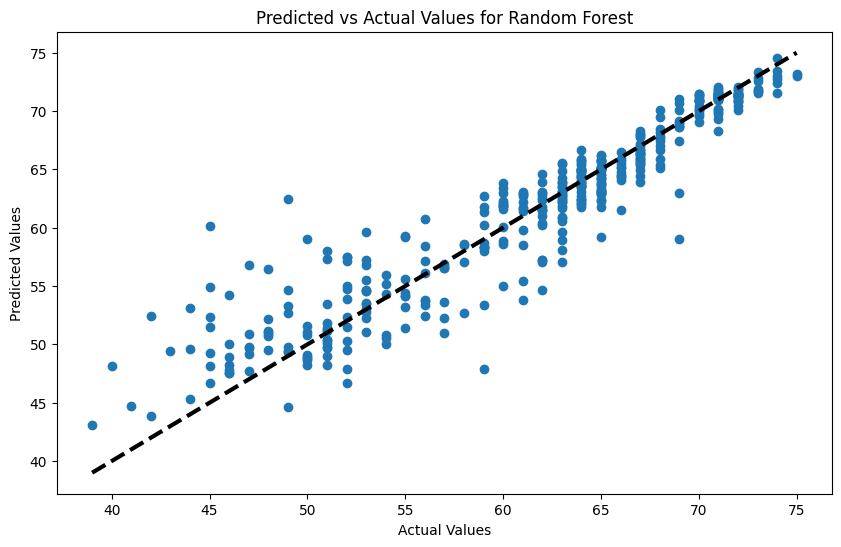

Gradient Boosting - Mean squared error: 9.59709704320679
Gradient Boosting - R2 score: 0.8545039321480048
------------------------------
Predictions vs Actual Values:
Prediction: 63.68, Actual: 65.00
Prediction: 71.37, Actual: 71.00
Prediction: 43.81, Actual: 42.00
Prediction: 55.52, Actual: 55.00
Prediction: 61.82, Actual: 62.00


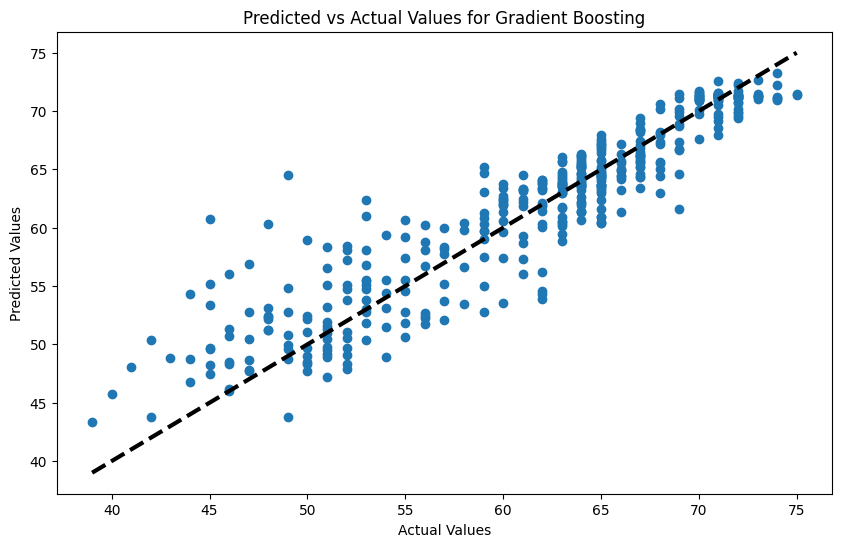

KNN - Mean squared error: 15.75764705882353
KNN - R2 score: 0.7611073770186342
------------------------------
Predictions vs Actual Values:
Prediction: 64.00, Actual: 65.00
Prediction: 71.00, Actual: 71.00
Prediction: 43.00, Actual: 42.00
Prediction: 55.00, Actual: 55.00
Prediction: 61.00, Actual: 62.00


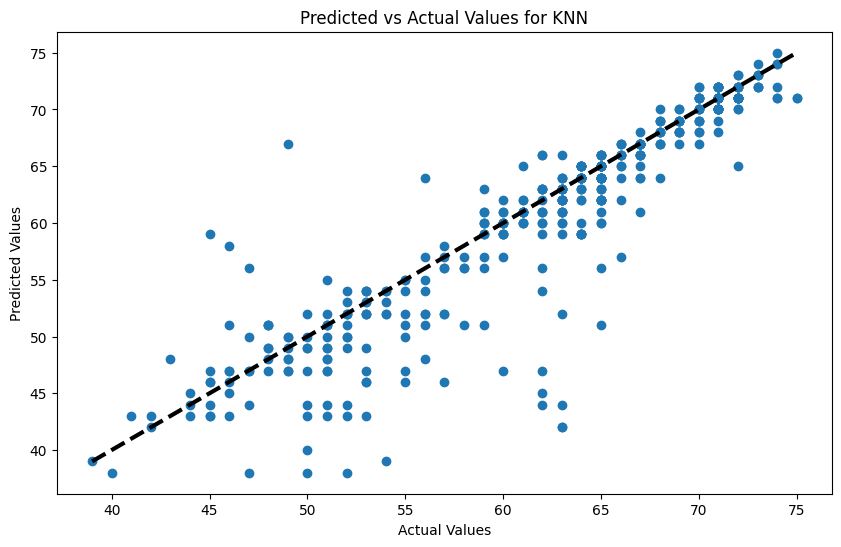

Fold 5/5
LinearRegression - Mean squared error: 15.734622493687489
LinearRegression - R2 score: 0.7614564392065244
------------------------------
Predictions vs Actual Values:
Prediction: 60.19, Actual: 65.00
Prediction: 72.53, Actual: 71.00
Prediction: 50.55, Actual: 42.00
Prediction: 50.30, Actual: 55.00
Prediction: 61.53, Actual: 62.00


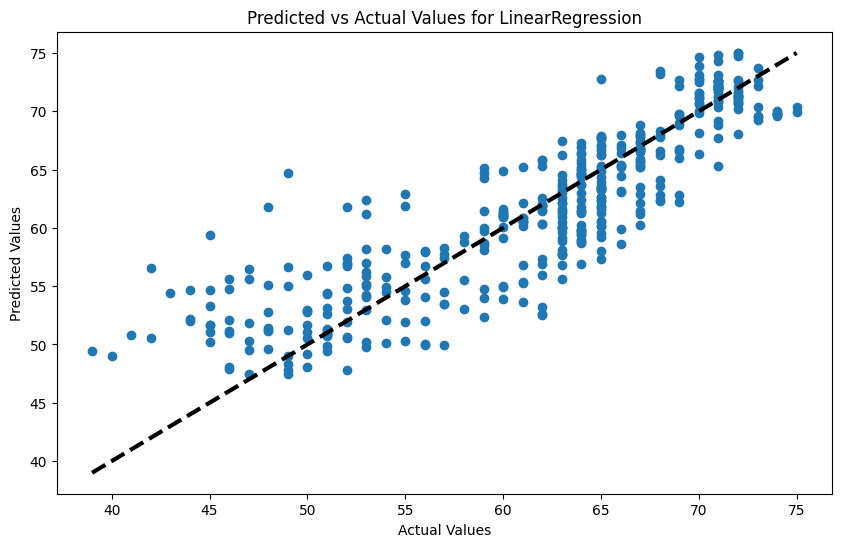

Random Forest - Mean squared error: 7.504599529411766
Random Forest - R2 score: 0.8862270833130494
------------------------------
Predictions vs Actual Values:
Prediction: 63.71, Actual: 65.00
Prediction: 70.83, Actual: 71.00
Prediction: 43.17, Actual: 42.00
Prediction: 54.16, Actual: 55.00
Prediction: 59.98, Actual: 62.00


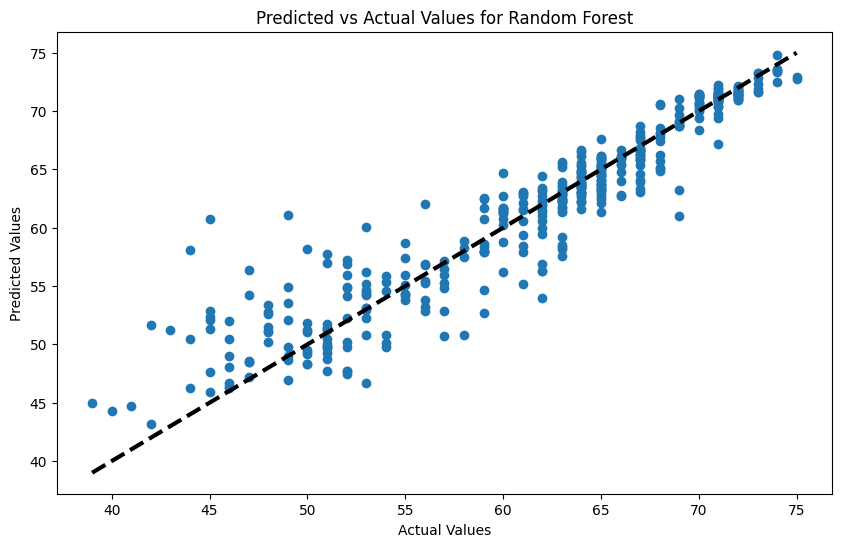

Gradient Boosting - Mean squared error: 9.843851486965699
Gradient Boosting - R2 score: 0.850763029963699
------------------------------
Predictions vs Actual Values:
Prediction: 63.59, Actual: 65.00
Prediction: 71.32, Actual: 71.00
Prediction: 41.69, Actual: 42.00
Prediction: 55.28, Actual: 55.00
Prediction: 60.92, Actual: 62.00


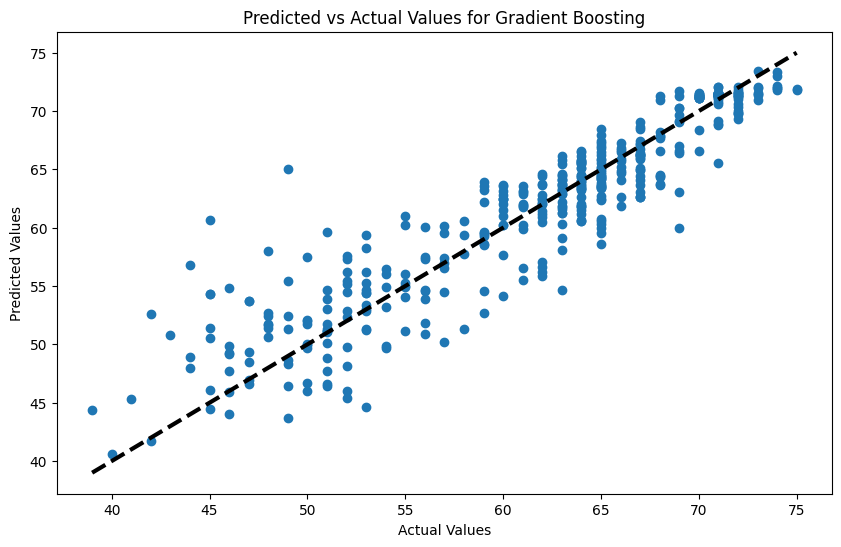

KNN - Mean squared error: 14.92470588235294
KNN - R2 score: 0.7737351190725992
------------------------------
Predictions vs Actual Values:
Prediction: 64.00, Actual: 65.00
Prediction: 71.00, Actual: 71.00
Prediction: 51.00, Actual: 42.00
Prediction: 54.00, Actual: 55.00
Prediction: 61.00, Actual: 62.00


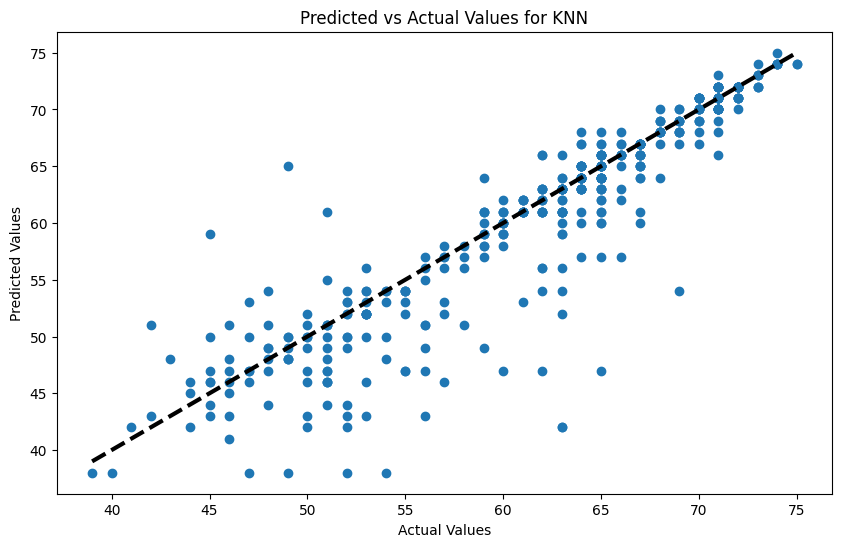

In [15]:


num_folds = 5
folds = KFold(n_splits = num_folds, random_state = None)
acc_scores  = []

for fold, (train_row_index, test_row_index )in enumerate(folds.split(X_train)):
    print(f"Fold {fold + 1}/{num_folds}")
    print("=" * 30)
    X_train_new = X_train.iloc[train_row_index]
    X_val = X_train.iloc[test_row_index]

    y_train_new = y_train.iloc[train_row_index]
    y_val = y_train.iloc[test_row_index]

    fit_models(X_train_new, y_train_new)
    print("=" * 30)


# Analysis

Overall, random forest consistently achieved the highest R2 value out of all of the other models, with an average R2 value of 0.88-0.89. Gradient Boosting was close behind in performance, and linear regression and KNN performed the worst out of all the models.